# TicTacTrip data crunching

## Question 1

**basic imports**

In [29]:
import numpy as np
import pandas as pd

**load the dataset**

In [30]:
cities = pd.read_csv('data/cities.csv')
providers = pd.read_csv('data/providers.csv')
stations = pd.read_csv('data/stations.csv')
ticket_data = pd.read_csv('data/ticket_data.csv')

In [31]:
dataset = {'cities': cities, 'providers': providers, 'stations': stations, 'ticket_data': ticket_data}

**Price statistics**

In [138]:
print('_________________________________________________________')
print('    Price statistics')
print('_________________________________________________________')
print('    number of NAN values in price_in_cents =', ticket_data['price_in_cents'].isna().sum())
print('    number of trips =', len(ticket_data))
print('    min price =', round(ticket_data['price_in_cents'].min()/100, 2), '€')
print('    max price =', round(ticket_data['price_in_cents'].max()/100, 2), '€')
print('    median price =', round(ticket_data['price_in_cents'].median()/100, 2), '€')
print('    mean price =', round(ticket_data['price_in_cents'].mean()/100, 2), '€')
print('    most trips have a price =', round(ticket_data['price_in_cents'].value_counts().idxmax()/100, 2), '€')
print('_________________________________________________________')

_________________________________________________________
    Price statistics
_________________________________________________________
    number of NAN values in price_in_cents = 0
    number of trips = 74168
    min price = 3.0 €
    max price = 385.5 €
    median price = 33.5 €
    mean price = 43.83 €
    most trips have a price = 17.0 €
_________________________________________________________


43.82711061374177


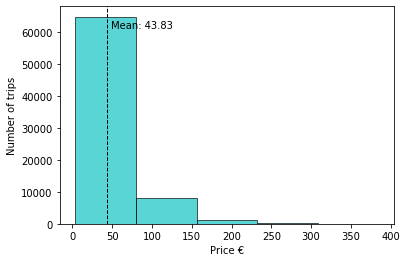

In [157]:
import matplotlib.pyplot as plt
ticket_data['price'] = round(ticket_data['price_in_cents'] / 100, 2)
ticket_data['bin'] = pd.cut(ticket_data['price'], bins=5)
ticket_data.groupby('bin')['price'].count().plot(kind='bar', width=0.98)
plt.xlabel('Price €')
plt.ylabel('Number of trips')
# axe of mean
print(ticket_data['price'].mean())
plt.axvline(ticket_data['price'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

**Duration statistics**

first we need to get the duration from the ticket information

In [104]:
# add duration column in hours
fmt = '%Y-%m-%d %H:%M:%S+%f'
ticket_data['departure_ts'] = pd.to_datetime(ticket_data['departure_ts'], format=fmt)
ticket_data['arrival_ts'] = pd.to_datetime(ticket_data['arrival_ts'], format=fmt)
ticket_data['duration'] = ticket_data['arrival_ts'] - ticket_data['departure_ts']
ticket_data['duration'] = round(ticket_data['duration'].dt.seconds / 3600, 2)

In [105]:
print('_________________________________________________________')
print('    Duration statistics')
print('_________________________________________________________')
print('    number of NAN values in departure_ts =', ticket_data['departure_ts'].isna().sum())
print('    number of NAN values in arrival_ts =', ticket_data['arrival_ts'].isna().sum())
print('    min duration =', round(ticket_data['duration'].min(), 2), 'hours')
print('    max duration =', round(ticket_data['duration'].max(), 2), 'hours')
print('    median duration =', round(ticket_data['duration'].median(), 2), 'hours')
print('    mean duration =', round(ticket_data['duration'].mean(), 2), 'hours')
print('    most trips have a duration =', round(ticket_data['duration'].value_counts().idxmax(), 2), 'hours')
print('_________________________________________________________')

_________________________________________________________
    Duration statistics
_________________________________________________________
    number of NAN values in departure_ts = 0
    number of NAN values in arrival_ts = 0
    min duration = 0.0 hours
    max duration = 23.97 hours
    median duration = 4.82 hours
    mean duration = 6.02 hours
    most trips have a duration = 2.5 hours
_________________________________________________________


## Question 2

In [106]:
from helpers import Helpers

In [107]:
ticket_data['distance'] = ticket_data.loc[['lat', 'lon']]
ticket_data['distance'] = round(ticket_data['distance'], 2)

KeyError: "None of [Index(['lat', 'lon'], dtype='object')] are in the [index]"

In [ ]:
lat1 = 52.2296756
lon1 = 21.0122287
lat2 = 52.406374
lon2 = 16.9251681
print(Helpers.distance(lat1, lon1, lat2, lon2))
print(Helpers.distanceTrip([(lat1, lon1), (lat2, lon2)]))
print(Helpers.distanceTrip([(lat1, lon1), (lat2, lon2), (lat1, lon1)]))
print(Helpers.distanceTrip([(lat1, lon1), (lat2, lon2), (lat2, lon2)]))